In [5]:
from sklearn.datasets import load_wine
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

In [10]:
data = load_wine(as_frame=True)

In [31]:
print(data.target_names)
print(data.feature_names)

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [40]:
wine = data.frame

In [48]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [99]:
# so there is one bad column name, need to change it
wine = wine.rename({'od280/od315_of_diluted_wines':'od280_od315_of_diluted_wines'}, axis='columns')

In [101]:
predictors= wine.columns.to_list()[:-1]
predictors

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280_od315_of_diluted_wines',
 'proline']

If we use pairplots we see that this dataset seems separable so will this many predictors we should get a good result

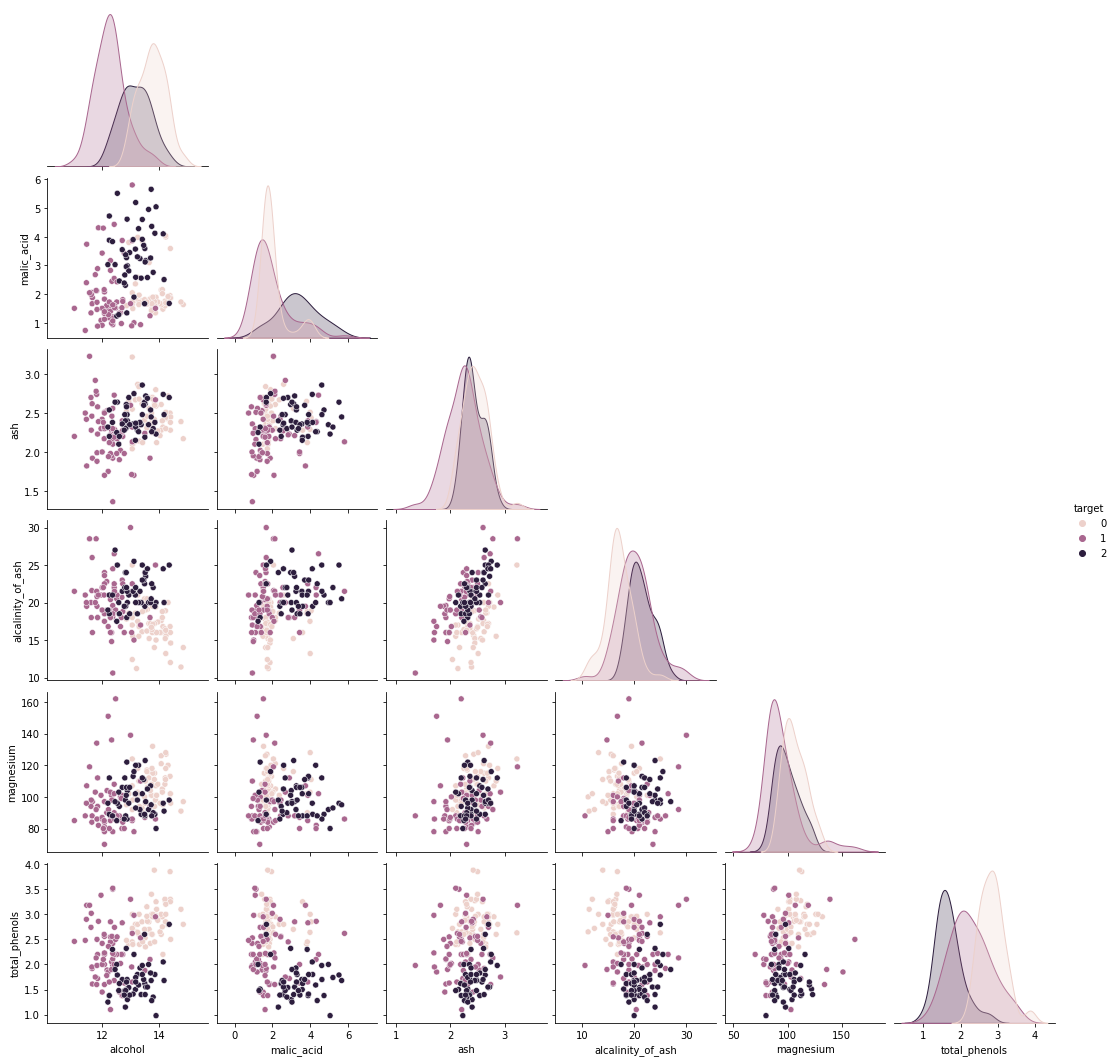

In [102]:
sns.pairplot(wine[ predictors[:6] +['target'] ],  hue='target', corner=True);

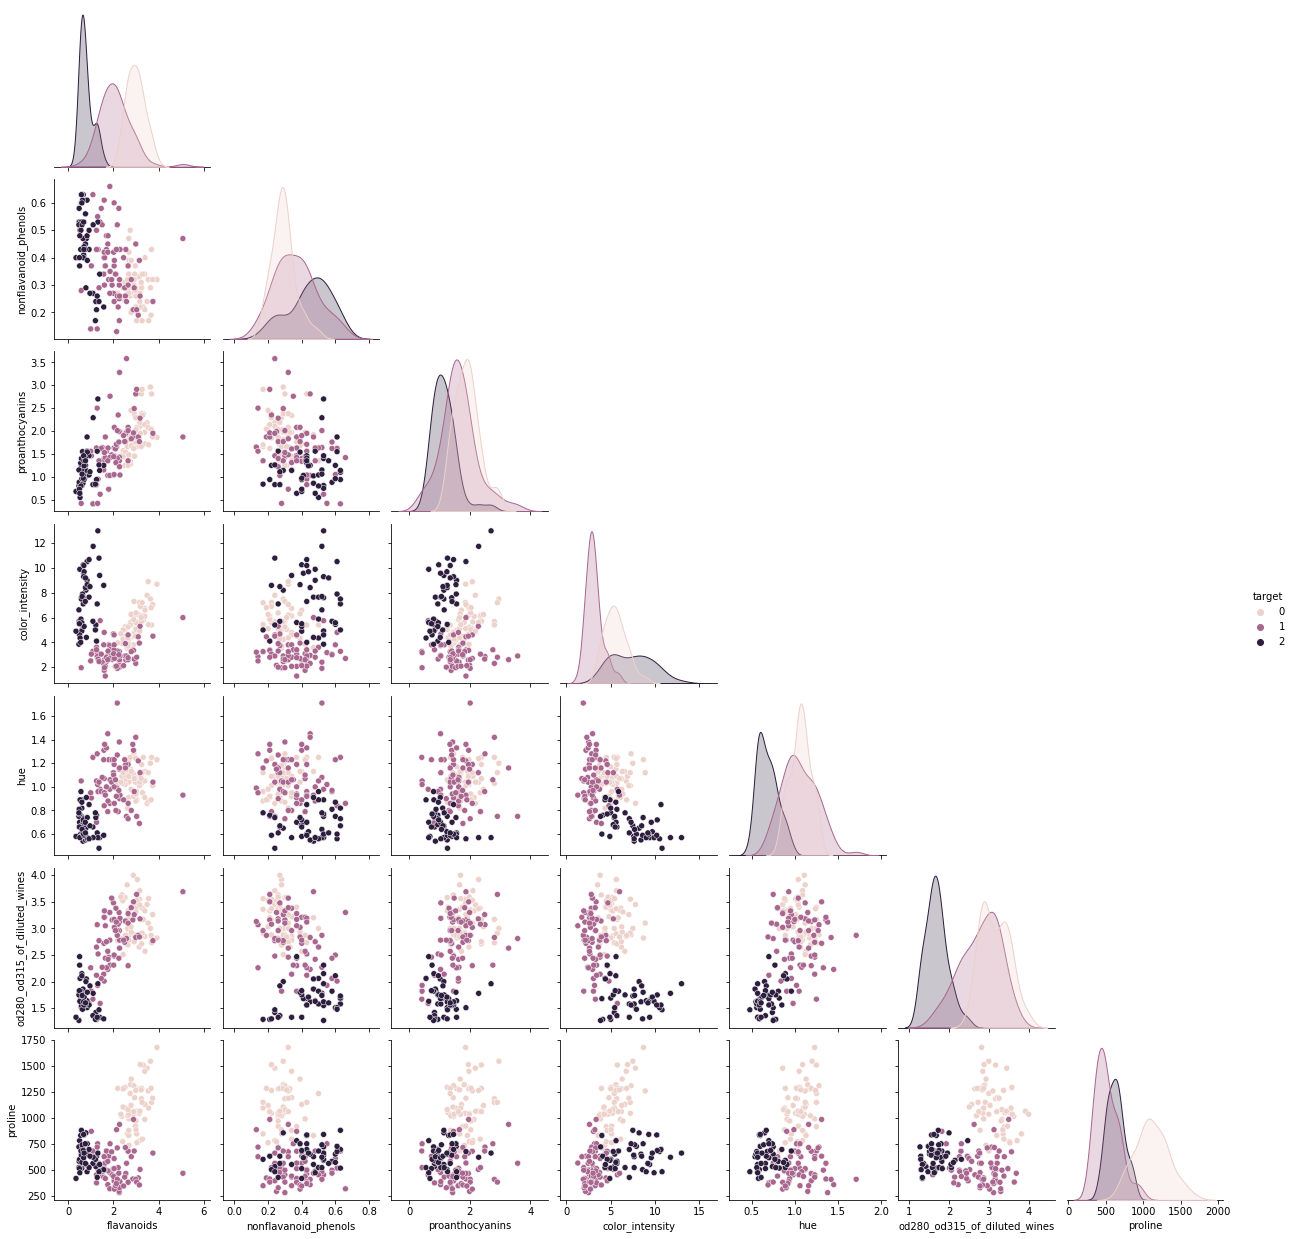

In [103]:
sns.pairplot(wine[ predictors[6:]+ ['target'] ],  hue='target', corner=True);

In [47]:
wine.info() # no categorical data?

Should look at the distributions to be sure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

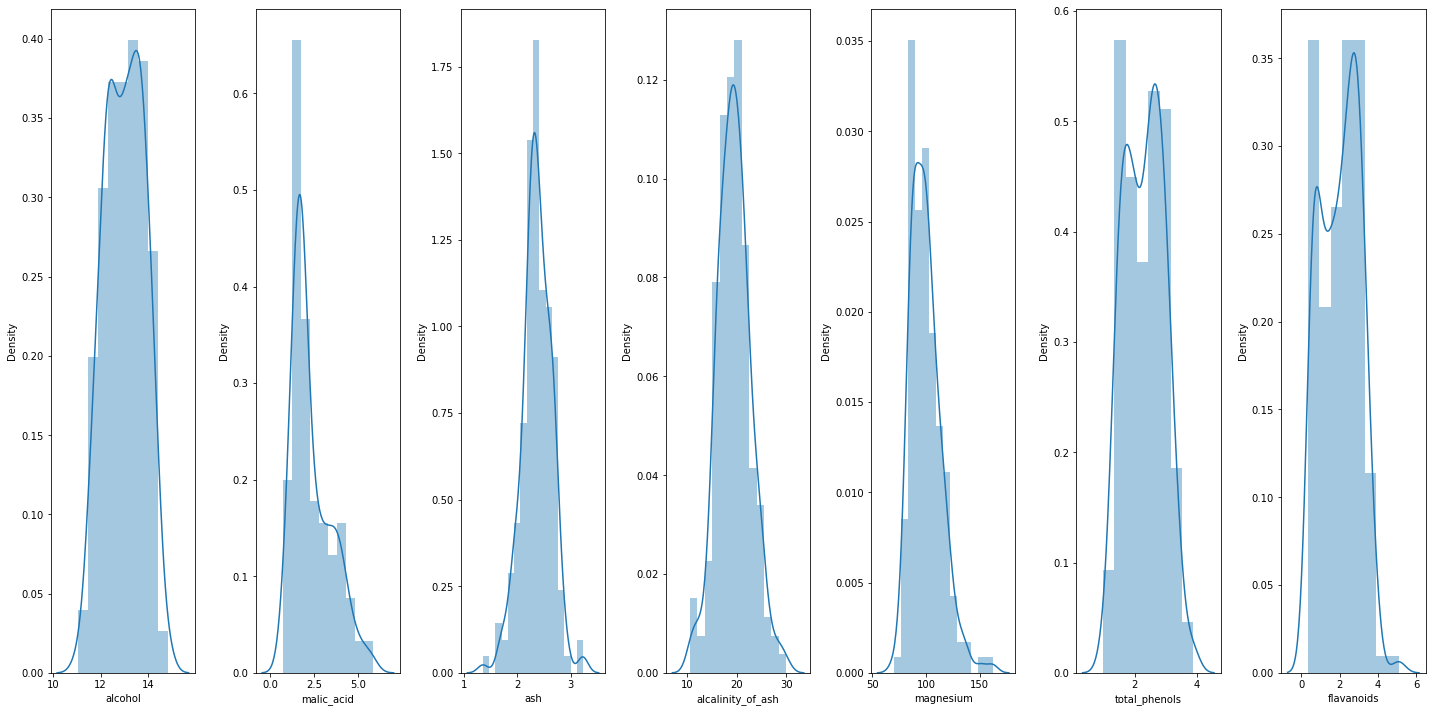

In [79]:
_, axes = plt.subplots(1, len(predictors)//2 , figsize=(20,10))
for i, predictor in enumerate(predictors[:len(predictors)//2]):
    sns.distplot(wine[predictor], ax=axes[i])
plt.tight_layout()

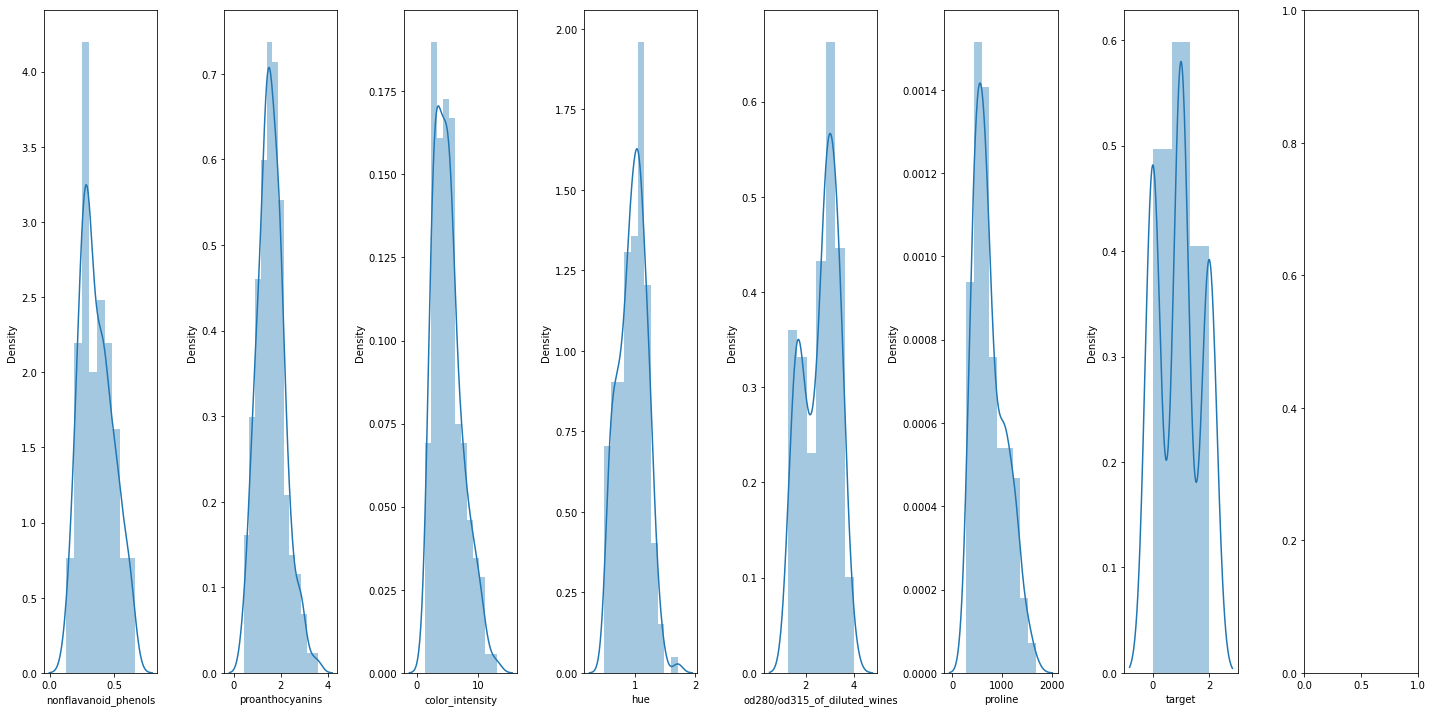

In [80]:
_, axes = plt.subplots(1, len(predictors)//2+1 , figsize=(20,10))
for i, predictor in enumerate(predictors[len(predictors)//2:]):
    sns.distplot(wine[predictor], ax=axes[i])
plt.tight_layout()

In [ ]:
Okay so if you dig around in the data, you see that all the predictors are continuous values. No categoricals

In [106]:
predictors

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280_od315_of_diluted_wines',
 'proline']

In [112]:
# Note that there are three target classes, but smf.logit can only build a model for binary targets!

# So let's build a classifier which can tell if the wine is in class 1 or not

wine['target_is_class_1'] = np.where(wine['target']==1,1,0)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280_od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [113]:
formula_1 = 'target_is_class_1 ~ '
for item in predictors:
    formula_1 = formula_1 + f'+ {item}'
formula_1

'target_is_class_1 ~ + alcohol+ malic_acid+ ash+ alcalinity_of_ash+ magnesium+ total_phenols+ flavanoids+ nonflavanoid_phenols+ proanthocyanins+ color_intensity+ hue+ od280_od315_of_diluted_wines+ proline'

### We will try to use all the predictors, but it will *fail*.

```python
model = smf.logit(formula=formula_1, data=wine).fit()
```


Warning: Maximum number of iterations has been exceeded.
         Current function value: inf
         Iterations: 35
         
LinAlgError                               Traceback (most recent call last)
<ipython-input-115-8932da186200> in <module>
----> 1 model = smf.logit(formula=formula_1, data=wine).fit()
    
[...]
LinAlgError: Singular matrix 

LinAlgError: Singular matrix means we have an abundance of riches. We have so many predictors that they are all correlated with each other, so statsmodels cannot solve the problem.

So what do we do? Get rid of some predictors, of course!

In [117]:
formula_2 = 'target_is_class_1 ~ '
for item in predictors[:7]:
    formula_2 = formula_2 + f'+ {item}'
formula_2

'target_is_class_1 ~ + alcohol+ malic_acid+ ash+ alcalinity_of_ash+ magnesium+ total_phenols+ flavanoids'

In [123]:
model_2 = smf.logit(formula=formula_2, data=wine).fit()

Optimization terminated successfully.
         Current function value: 0.154202
         Iterations 9


In [124]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      target_is_class_1   No. Observations:                  178
Model:                          Logit   Df Residuals:                      170
Method:                           MLE   Df Model:                            7
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                  0.7707
Time:                        17:52:36   Log-Likelihood:                -27.448
converged:                       True   LL-Null:                       -119.71
Covariance Type:            nonrobust   LLR p-value:                 2.148e-36
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            74.3418     14.726      5.048      0.000      45.479     103.205
alcohol              -5.2083      1.047     -4.976      0.000      -7.260      -3.157
malic_acid           -1.0241      0.371     -2.761      0.006      -1.751      -0.297
ash                  -7.9989      2.078     -3.850      0.000     -12.071      -3.926
alcalinity_of_ash     0.6807      0.181      3.761      0.000       0.326       1.036
magnesium            -0.0416      0.026     -1.593      0.111      -0.093       0.010
total_phenols        -0.0705      1.210     -0.058      0.954      -2.442       2.301
flavanoids            2.2238      0.803      2.768      0.006       0.649       3.798
=====================================================================================
"""

In [120]:
# Let's try a different model now
formula_3 = 'target_is_class_1 ~ '
for item in predictors[7:]:
    formula_3 = formula_3 + f'+ {item}'
formula_3

'target_is_class_1 ~ + nonflavanoid_phenols+ proanthocyanins+ color_intensity+ hue+ od280_od315_of_diluted_wines+ proline'

In [122]:
model_3 = smf.logit(formula=formula_3, data=wine).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.073622
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      target_is_class_1   No. Observations:                  178
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            6
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                  0.8905
Time:                        17:51:25   Log-Likelihood:                -13.105
converged:                       True   LL-Null:                       -119.71
Covariance Type:            nonrobust   LLR p-value:                 2.902e-43
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       16.5700      7.357      2.252      0.024       2.151      30.989
nonflavanoid_phenols            -4.3124      4.631     -0.931      0.352     -13.388       4.764
proanthocyanins                  2.8667      1.710      1.677      0.094      -0.485       6.218
color_intensity                 -3.1596      1.056     -2.992      0.003      -5.229      -1.090
hue                             15.7931      6.517      2.423      0.015       3.020      28.566
od280_od315_of_diluted_wines    -1.3281      1.211     -1.096      0.273      -3.702       1.046
proline                         -0.0259      0.008     -3.081      0.002      -0.042      -0.009
================================================================================================

Possibly complete quasi-separation: A fraction 0.57 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

If we compare model_2 with model_3, we see that model_3 is better. 

Statsmodels even tells us that 57% of the observations can be perfectly predicted!

In [ ]:
# Let's play around a little more

In [127]:
formula_4 = 'target_is_class_1 ~ proanthocyanins+ color_intensity+ hue+ proline'
model_4 = smf.logit(formula=formula_4, data=wine).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.078576
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      target_is_class_1   No. Observations:                  178
Model:                          Logit   Df Residuals:                      173
Method:                           MLE   Df Model:                            4
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                  0.8832
Time:                        17:59:57   Log-Likelihood:                -13.986
converged:                       True   LL-Null:                       -119.71
Covariance Type:            nonrobust   LLR p-value:                 1.292e-44
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.7889      6.615      2.085      0.037       0.824      26.753
proanthocyanins     1.8945      1.109      1.708      0.088      -0.279       4.068
color_intensity    -3.0147      0.983     -3.065      0.002      -4.942      -1.087
hue                11.6289      4.647      2.502      0.012       2.521      20.737
proline            -0.0223      0.006     -3.434      0.001      -0.035      -0.010
===================================================================================

Possibly complete quasi-separation: A fraction 0.52 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""